In [2]:
## Today i will learn more about Auto-encoders using by 

## Auto encoders is type of ANN used to learn data encodings in an unspervised manner 
# The aim of the auto-encoder is to learn lower-dimensional representation(encoding) for a higher dimensional data 
## training Autoencoder network we need to capture the most important parts of the input image 


##Architecture of Autoencodrs
## Encoder :
## Bottleneck : it contains the compressed knowledge representations and is therefore the most important part of the network 
## Decoder : A module that helps the network“decompress” the knowledge representations and reconstructs the data back from its encoded form. The output is then compared with a ground truth.


## Encoder :
## it's a set of CONV blocks followed by pooling modules that compress the input into bottleneck
## The smaller the bottleneck , the lower the risk of overfitting
##Decoder :
###the decoder is a set of upsampling and convolutional blocks that reconstructs the bottleneck's output.

## Hyperparamaters before training Autoencoder

## Code Size : The code size or the size of the bottleneck is the most important hyperparameter used to tune the autoencoder. The bottleneck size decides how much the data has to be compressed. This can also act as a regularisation term
## In Autoencoders the input is x while the output is the same  x , therefore the term "reconstruction loss " is used to refer to how much x is restored to the error value 
##  a representation compressed into small dimenstionas is called a latent variable or simply Z
##

from filecmp import cmp
from sklearn.manifold import trustworthiness
from sqlalchemy import true
import torch 
import torchvision
import torch.nn.functional as Fn
from torchvision import transforms,datasets
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
import numpy as np 
from torch import nn 
from torch.utils.data import DataLoader

## hperperparamaters 


In [3]:

epochs =10 
batch_size =64
Use_Cuda = torch.cuda.is_available()
Device = torch.device("cuda" if Use_Cuda else "cpu")
print("using device ",Device)

## we will use only training dataset of fashion mnist 

train_set = datasets.FashionMNIST(root ='/home/iamismail/Rebirth Pytorch',train=True,download=True,transform=transforms.ToTensor())
train_louder = DataLoader(dataset=train_set,batch_size=batch_size,shuffle=True, num_workers=2)



using device  cpu


In [4]:
##Autoencoder model 
class Autoenoder(nn.Module):
    def __init__(self) : 
        super(Autoenoder,self).__init__()

        ##Encoder model 
        self.encoder = nn.Sequential(
            nn.Linear(28*28,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,12),
            nn.ReLU(),
            nn.Linear(12,3),


        )

        self.decoder = nn.Sequential(
            nn.Linear(3,12),
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,28*28),
            nn.Sigmoid(),
        )
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded ,decoded
    

In [5]:
autoencoder_model = Autoenoder().to(Device)
optimizer = torch.optim.Adam(autoencoder_model.parameters(),lr =0.005)
criterian = nn.MSELoss()

In [6]:
##reshape our image s
view = train_set.data[:5].view(-1,28*28)
view_data = view.type(torch.FloatTensor)/255

In [7]:
def train(autoencoder,train_louder):
    autoencoder.train()

    for step,(data,label) in enumerate(train_louder):
        data = data.view(-1,28*28).to(Device)
        y = data.view(-1,28*28).to(Device)
        label = label.to(Device)

        encoded , decoded = autoencoder(data)
        loss = criterian(decoded,data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

[Epoch 1]


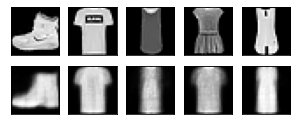

[Epoch 2]


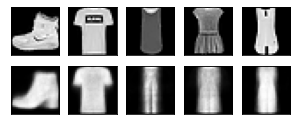

[Epoch 3]


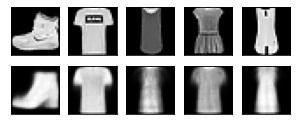

[Epoch 4]


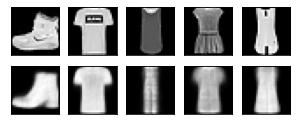

[Epoch 5]


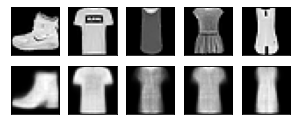

[Epoch 6]


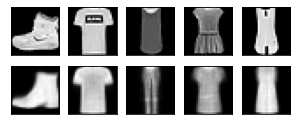

[Epoch 7]


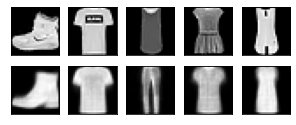

[Epoch 8]


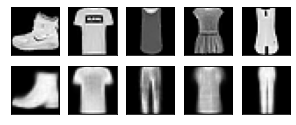

[Epoch 9]


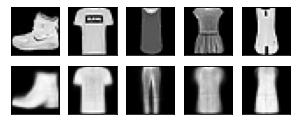

[Epoch 10]


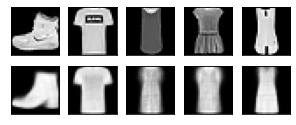

In [8]:
for epoch in range(1, epochs+1):
    train(autoencoder_model, train_louder)

    # 디코더에서 나온 이미지를 시각화 하기 (두번째 열)
    test_x = view_data.to(Device)
    _, decoded_data = autoencoder_model(test_x)

    # 원본과 디코딩 결과 비교해보기
    f, a = plt.subplots(2, 5, figsize=(5, 2))
    print("[Epoch {}]".format(epoch))
    for i in range(5):
        img = np.reshape(view_data.data.numpy()[i],(28, 28))
        a[0][i].imshow(img, cmap='gray')
        a[0][i].set_xticks(()); a[0][i].set_yticks(())

    for i in range(5):
        img = np.reshape(decoded_data.to("cpu").data.numpy()[i], (28, 28))
        a[1][i].imshow(img, cmap='gray')
        a[1][i].set_xticks(()); a[1][i].set_yticks(())
    plt.show()

In [15]:
## Looking into latent variables 
view_data = train_set.data[:200].view(-1,28*28)
view_data = view_data.type(torch.FloatTensor)/255
test_x = view_data.to(Device)
encoded_data ,_=autoencoder_model(test_x)
encoded_data = encoded_data.to("cpu")

/tmp/ipykernel_188074/2929829728.py:15: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


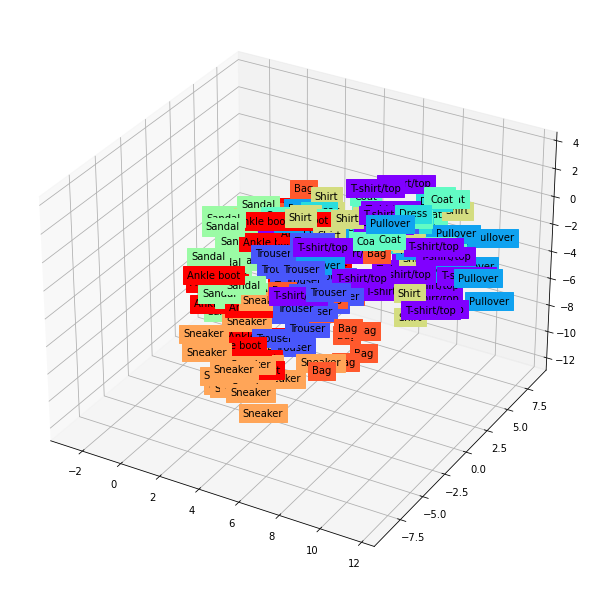

In [16]:
CLASSES = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)

X = encoded_data.data[:, 0].numpy()
Y = encoded_data.data[:, 1].numpy()
Z = encoded_data.data[:, 2].numpy()

labels = train_set.targets[:200].numpy()

for x, y, z, s in zip(X, Y, Z, labels):
    name = CLASSES[s]
    color = cm.rainbow(int(255*s/9))
    ax.text(x, y, z, name, backgroundcolor=color)

ax.set_xlim(X.min(), X.max())
ax.set_ylim(Y.min(), Y.max())
ax.set_zlim(Z.min(), Z.max())
plt.show()